# Gold Price Prediction Using Random Forest Regression

### Table of Content:
1. Import required libraries
2. Load dataset and pre-process the data
3. Correlationn factor
4. Train the data
5. Load the model
6. Test the data
7. R square
8. Compare the actual and predicted value

### Important Libraries

In [58]:
import numpy as nption
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data import and Data Preprocessing

In [59]:
data = pd.read_csv("Gold_Price_dataset.csv")
data

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2017-02-06,0.79,0.79,0.76,0.76,0.790000,7430.0,7.0,5848.0,7430.0,100.00,0.03,-0.03
1,2017-02-03,0.79,0.79,0.79,0.79,0.790000,310.0,4.0,244.0,310.0,100.00,0.00,0.00
2,2017-02-02,0.83,0.83,0.83,0.83,0.830000,75.0,1.0,62.0,75.0,100.00,0.00,0.00
3,2017-01-31,0.87,0.87,0.87,0.87,0.870000,1050.0,2.0,913.0,1050.0,100.00,0.00,0.00
4,2017-01-25,0.91,0.91,0.91,0.91,0.910000,400.0,1.0,364.0,400.0,100.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,2009-12-07,65.55,71.00,57.60,65.25,64.071524,42741.0,286.0,2738481.0,14444.0,33.79,13.40,-0.30
1656,2009-12-04,84.95,84.95,66.30,71.95,73.919145,133820.0,430.0,9891860.0,82395.0,61.57,18.65,-13.00
1657,2009-12-03,72.00,72.00,65.20,70.80,71.469977,84551.0,368.0,6042858.0,61676.0,72.95,6.80,-1.20
1658,2009-12-02,60.00,60.00,60.00,60.00,60.000000,250.0,3.0,15000.0,250.0,100.00,0.00,0.00


Data.info shows the number of null values present in dataset. If there is null value then we need to pre-process it but right now there is no null or all non-null values present so we don't need any further data cleaning.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1660 non-null   object 
 1   Open                       1660 non-null   float64
 2   High                       1660 non-null   float64
 3   Low                        1660 non-null   float64
 4   Close                      1660 non-null   float64
 5   WAP                        1660 non-null   float64
 6   No. of Shares              1660 non-null   float64
 7   No. of Trades              1660 non-null   float64
 8   Total Turnover             1660 non-null   float64
 9   Deliverable Quantity       1660 non-null   float64
 10  % Deli. Qty to Traded Qty  1660 non-null   float64
 11  Spread H-L                 1660 non-null   float64
 12  Spread C-O                 1660 non-null   float64
dtypes: float64(12), object(1)
memory usage: 168.7+ K

In [61]:
data.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1.660000e+03,1660.000000,1660.000000,1660.000000,1660.000000
mean,11.834367,12.174048,11.221578,11.673934,11.688802,101330.338554,122.983735,1.664520e+06,75754.484337,88.678651,0.952470,-0.160434
std,17.169590,17.704607,16.143363,16.837100,16.920058,140560.465729,138.844766,2.938726e+06,96646.348605,16.648158,1.960071,1.342787
min,0.500000,0.520000,0.500000,0.520000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,4.760000,0.000000,-17.150000
25%,1.350000,1.380000,1.320000,1.350000,1.336219,4393.250000,14.000000,7.159500e+03,4300.000000,78.932500,0.040000,-0.150000
50%,5.255000,5.380000,4.950000,5.085000,5.119729,33871.000000,72.500000,1.086300e+05,31095.000000,100.000000,0.180000,0.000000
75%,11.392500,11.940000,11.250000,11.377500,11.451724,153416.750000,185.250000,2.057775e+06,122723.000000,100.000000,0.890000,0.030000
max,84.950000,84.950000,71.500000,74.550000,74.972394,849341.000000,752.000000,2.383048e+07,631381.000000,100.000000,23.300000,14.000000


In [62]:
data.drop(columns = ["Date"], inplace = True)

### Correlation 

Finding correlations between all features using seaborn graph representation.

In [63]:
correlation = data.corr()

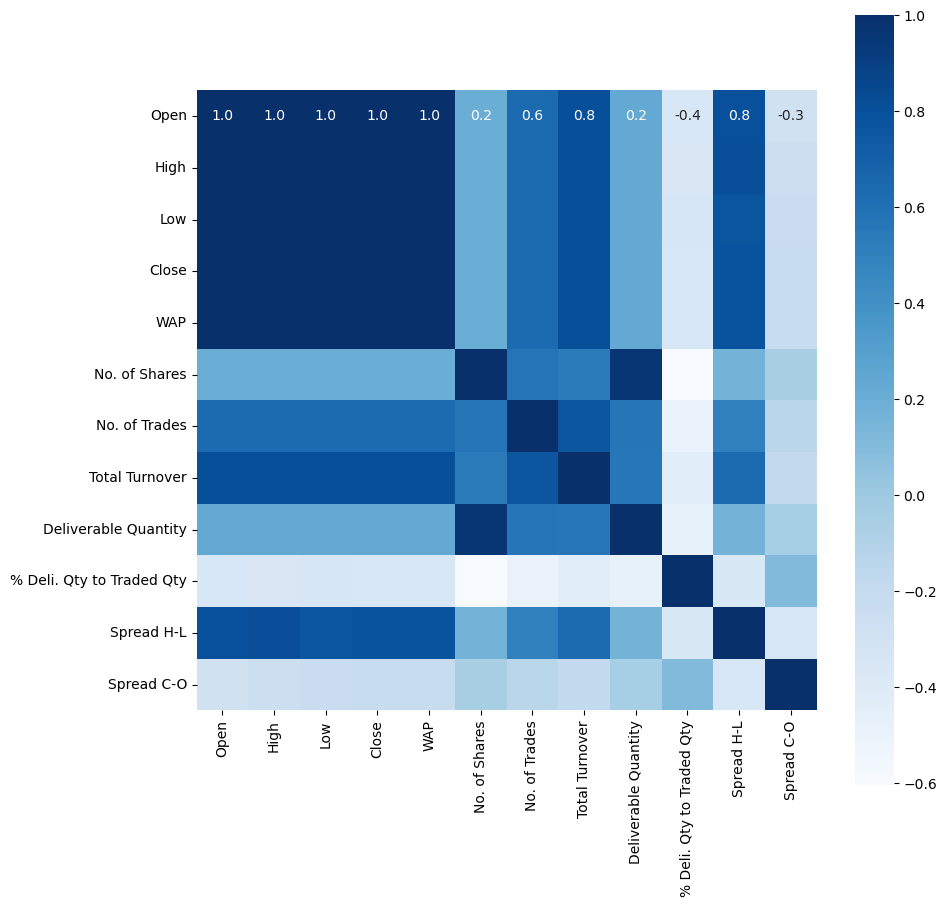

In [64]:
plt.figure(figsize = (10,10))
A = sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {"size":10}, cmap = "Blues")

In [65]:
correlation['Spread H-L']

Open                         0.803577
High                         0.816759
Low                          0.774332
Close                        0.791669
WAP                          0.792668
No. of Shares                0.162706
No. of Trades                0.505152
Total Turnover               0.638468
Deliverable Quantity         0.165507
% Deli. Qty to Traded Qty   -0.362187
Spread H-L                   1.000000
Spread C-O                  -0.348283
Name: Spread H-L, dtype: float64

In [66]:
correlation['Spread C-O']

Open                        -0.284317
High                        -0.249672
Low                         -0.231531
Close                       -0.210180
WAP                         -0.222151
No. of Shares               -0.051611
No. of Trades               -0.136711
Total Turnover              -0.193295
Deliverable Quantity        -0.046712
% Deli. Qty to Traded Qty    0.114005
Spread H-L                  -0.348283
Spread C-O                   1.000000
Name: Spread C-O, dtype: float64

C:\Users\Devender\AppData\Local\Temp\ipykernel_7080\1917134292.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spread H-L'], color = 'Red')
H:\Users\Devender\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Spread H-L', ylabel='Density'>

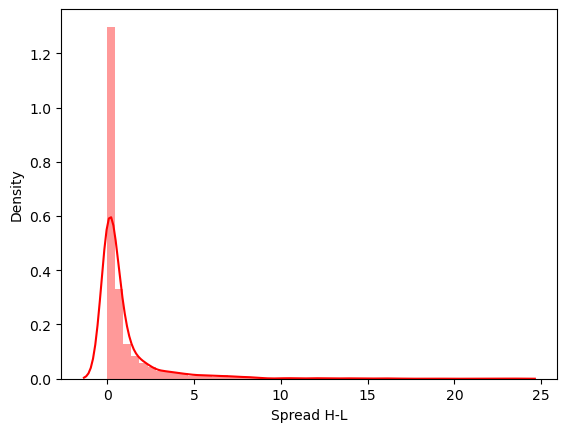

In [67]:
sns.distplot(data['Spread H-L'], color = 'Red')

### Data Training 

Label the features 'High' and 'Open' as X and Y as target value 'Spread H-L'. Train the data using train test split with train size is 0.8 i.e. 80% of data is used for training of model and rest is used for test purpose.

In [74]:
X = data[['High', 'Open']]
y = data['Spread H-L']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

### Load the Model

Randon forest Regression is used to predict the value.

In [77]:
model = RandomForestRegressor(n_estimators = 100)

In [78]:
model.fit(X_train, y_train)

RandomForestRegressor()

### Test the Model on test data

In [80]:
test_data = model.predict(X_test)
test_data

array([4.56000000e+00, 8.45000000e-02, 6.08300000e+00, 4.07472460e-01,
       6.61630000e-01, 5.62700000e-01, 4.82850000e+00, 6.35300000e-01,
       5.26969444e-02, 1.33200000e-01, 9.85033333e-02, 8.19285714e-03,
       1.65100000e+00, 6.35900000e-01, 1.13200000e+00, 3.30300000e+00,
       8.68116667e-02, 1.87390000e+01, 4.14983333e-02, 4.71400000e+00,
       1.39350000e+00, 6.45000000e-02, 1.24858095e-01, 1.44450000e+00,
       1.52640000e+00, 5.51750000e+00, 8.25241651e-02, 1.28200000e-01,
       5.44300000e-01, 3.28411111e-02, 3.84211667e-01, 1.03780000e+00,
       3.07525000e-01, 4.77250433e-02, 6.52841667e-02, 5.06187500e+00,
       1.90650000e+00, 9.90433333e-02, 9.66666667e-04, 1.65840000e+00,
       1.48800000e-01, 9.85400000e-02, 1.36283333e-01, 3.68450000e+00,
       2.23050000e+00, 1.44200000e+00, 5.37866667e-01, 1.93247009e-02,
       3.37277778e-03, 1.04728571e-02, 8.42000000e-03, 1.02878810e-01,
       1.20000000e-03, 4.77450000e-01, 3.37277778e-03, 1.15000000e-02,
      

### R squared error 

In [83]:
#  R squared error
error_score = metrics.r2_score(y_test, test_data)
error_score

0.6645819381345148

### Comparision the actual value to predicted value in plot

In [85]:
y_test = list(y_test)

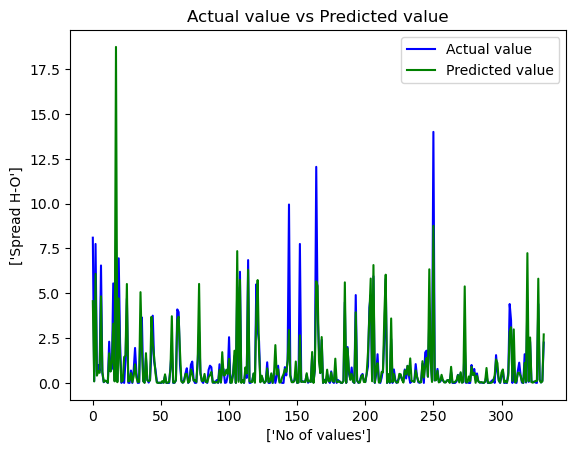

In [87]:
plt.plot(y_test, color = 'blue', label = 'Actual value')
plt.plot(test_data, color = 'green', label = 'Predicted value')
plt.title('Actual value vs Predicted value')
plt.xlabel(["No of values"])
plt.ylabel(['Spread H-O'])
plt.legend()
plt.show()